In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.neural_network import MLPClassifier
from sklearn import decomposition

from mpl_toolkits.mplot3d import Axes3D

from pandas.tools.plotting import parallel_coordinates

from os import listdir
from sklearn.decomposition import PCA


In [10]:
x_train_file = "X_train.txt"
y_train_file = "y_train.txt"

x_test_file = "X_test.txt"
y_test_file = "y_test.txt"

path_to_data = "UCI HAR Dataset" 
path_to_training_data = "/".join([path_to_data, "train"])
path_to_test_data = "/".join([path_to_data, "test"])

features_file = "features.txt"


In [11]:
# Load data into numpy arrays
X_train_np = np.loadtxt(path_to_training_data + "/" + x_train_file)
y_train_np = np.loadtxt(path_to_training_data + "/" + y_train_file)

X_test_np = np.loadtxt(path_to_test_data + "/" + x_test_file)
y_test_np = np.loadtxt(path_to_test_data + "/" + y_test_file)

# Load features list
features_df = pd.read_csv(path_to_data + "/" + features_file, sep = " ", index_col=0, header=None) 
features_df.columns = ["names"]

# Convert to pandas data frame
X_train_df = pd.DataFrame(X_train_np)
y_train_df = pd.DataFrame(y_train_np)
X_test_df = pd.DataFrame(X_test_np)
y_test_df = pd.DataFrame(y_test_np)


# Label Columns
#X_train_df.columns = list(features_df.names.values)
y_train_df.columns = ["labels"]

In [12]:
X_train = np.array(X_train_np)
y_train = np.array(y_train_df).ravel()

X_test = np.array(X_test_df)
y_test = np.array(y_test_df).ravel()

Text(0.5,0,'Principal Component')

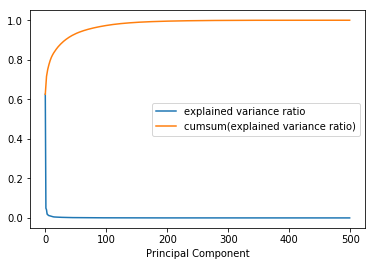

In [13]:
pca = PCA(n_components=500)
fit = pca.fit(X_train)
# summarize components
plt.plot(fit.explained_variance_ratio_, label="explained variance ratio")
plt.plot(fit.explained_variance_ratio_.cumsum(), label="cumsum(explained variance ratio)")
plt.legend()
plt.xlabel("Principal Component")
#plt.semilogy()
#plt.ylim(0.8,1)
#plt.xlim(0,300)
#print(fit.components_)

In [14]:
X_transform = pca.transform(X_train).T

In [17]:
#plt.scatter(X_transform[0], X_transform[1], c=y_train)



In [18]:
X_train_transform = pca.transform(X_train).T
X_test_transform = pca.transform(X_test).T

train_accuracy = []
test_accuracy = []
for j in range(1,10):
    print(j)
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(), random_state=3)
    clf.fit(X_train_transform.T[:,:j], y_train)  
    y_train_predict = clf.predict(X_train_transform.T[:,:j])
    y_test_predict = clf.predict(X_test_transform.T[:,:j])
    test_accuracy.append(sum([y_test[i] == y_test_predict[i] for i in range(len(y_test))])/len(y_test))
    train_accuracy.append(sum([y_train[i] == y_train_predict[i] for i in range(len(y_train))])/len(y_train))

for j in range(10,50,10):
    print(j)
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(), random_state=3)
    clf.fit(X_train_transform.T[:,:j], y_train)  
    y_train_predict = clf.predict(X_train_transform.T[:,:j])
    y_test_predict = clf.predict(X_test_transform.T[:,:j])
    test_accuracy.append(sum([y_test[i] == y_test_predict[i] for i in range(len(y_test))])/len(y_test))
    train_accuracy.append(sum([y_train[i] == y_train_predict[i] for i in range(len(y_train))])/len(y_train))

for j in range(50,301,50):
    print(j)
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(), random_state=3)
    clf.fit(X_train_transform.T[:,:j], y_train)  
    y_train_predict = clf.predict(X_train_transform.T[:,:j])
    y_test_predict = clf.predict(X_test_transform.T[:,:j])
    test_accuracy.append(sum([y_test[i] == y_test_predict[i] for i in range(len(y_test))])/len(y_test))
    train_accuracy.append(sum([y_train[i] == y_train_predict[i] for i in range(len(y_train))])/len(y_train))


1
2
3
4
5
6
7
8
9
10
20
30
40
50
100
150
200
250
300


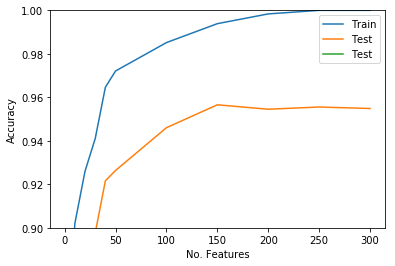

In [19]:


n_features = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,100,150,200,250,300]

plt.plot(n_features, train_accuracy, label="Train")
plt.plot(n_features, test_accuracy, label="Test")

plt.plot(n_features, np.array(train_accuracy) - np.array(test_accuracy), label="Test")

plt.xlabel("No. Features")
plt.ylabel("Accuracy")
plt.ylim(0.9,1)
plt.legend()

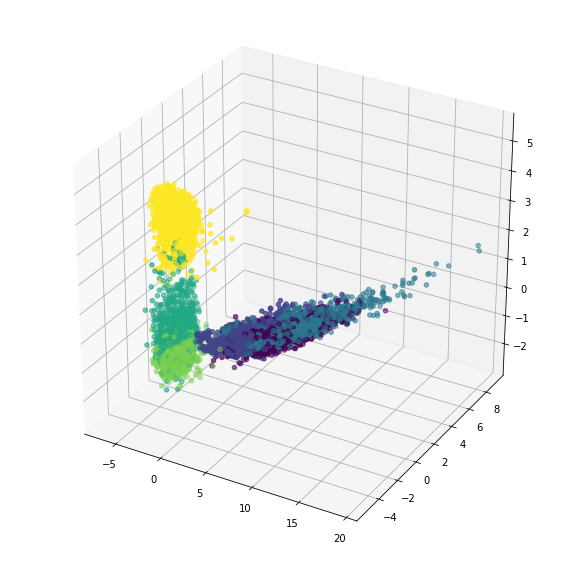

In [20]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train_transform[0], X_train_transform[1], X_train_transform[2], c=y_train)

plt.show()

In [165]:
print(train_accuracy[-1])
print(test_accuracy[-1])

0.8933623503808488
0.8666440447913132


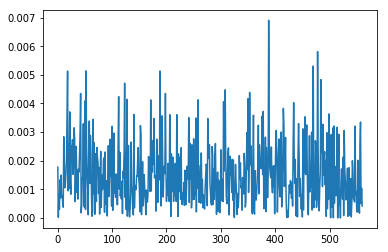

In [23]:
feature_contribution = np.mean(pca.components_, axis=0)
plt.plot(np.abs(feature_contribution))


In [180]:
selected_features = [i[0] for i in np.argwhere(feature_contribution > 0.06)]
selected_features


[556]

In [175]:
X_train_selected = np.array([X_train[:,i] for i in selected_features]).T
X_test_selected = np.array([X_test[:,i] for i in selected_features]).T

test_accuracy = []
train_accuracy = []
for i in range(10):   
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=())
    clf.fit(X_train_selected, y_train)    
    y_train_predict = clf.predict(X_train_selected)
    y_test_predict = clf.predict(X_test_selected)

    test_accuracy.append(sum([y_test[i] == y_test_predict[i] for i in range(len(y_test))])/len(y_test))
    train_accuracy.append(sum([y_train[i] == y_train_predict[i] for i in range(len(y_train))])/len(y_train))

test_accuracy_mean = np.mean(test_accuracy)
test_accuracy_std = np.std(test_accuracy)
train_accuracy_mean = np.mean(train_accuracy)
train_accuracy_std = np.std(train_accuracy)
    
print("Training accuracy : {0:.2f} +- {1:.2f} %".format(train_accuracy_mean*100, train_accuracy_std*100))
print("Testing accuracy  : {0:.2f} +- {1:.2f} %".format(test_accuracy_mean*100, test_accuracy_std*100))


Training accuracy : 86.72 +- 0.20 %
Testing accuracy  : 82.84 +- 0.17 %


In [159]:
pca.components_

array([[-7.15326815e-05, -2.99847927e-04, -2.31385358e-04, ...,
        -3.60833439e-02,  2.68253762e-02,  2.20742235e-02],
       [ 3.25696402e-03, -4.22310864e-04, -8.39509366e-04, ...,
         3.80396312e-02, -3.83432935e-02, -1.38720372e-02],
       [-2.45573796e-03, -6.24521615e-04,  3.68280307e-04, ...,
         2.89236609e-01, -1.24780863e-01, -1.11505431e-01],
       ...,
       [ 0.00000000e+00,  8.51506731e-17,  2.54402543e-16, ...,
        -1.31558334e-16, -9.46206979e-17, -4.81951001e-18],
       [-0.00000000e+00, -1.60752583e-16,  7.49224061e-17, ...,
        -1.76223494e-16, -1.22095273e-16,  1.66801252e-16],
       [-0.00000000e+00, -1.65762357e-17, -5.63886055e-17, ...,
        -1.22927741e-16, -1.70296332e-16,  2.90772754e-17]])